<a href="https://colab.research.google.com/github/ShashankAlluri28/INFO-5731Computational-Methods/blob/main/Alluri_Shashank_Assignment_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import csv

def clean_text(text):
    cleaned_text = text.lower()
    return cleaned_text

def generate_ngrams(text, n):
    words = text.split()
    ngrams = [tuple(words[i:i+n]) for i in range(len(words)-n+1)]
    return ngrams

def count_ngrams(csv_file, n):
    ngram_freq = {}
    with open(csv_file, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)
        for row in csv_reader:
            review, cleaned_review = row
            cleaned_review = clean_text(cleaned_review)
            ngrams = generate_ngrams(cleaned_review, n)
            for ngram in ngrams:
                if ngram in ngram_freq:
                    ngram_freq[ngram] += 1
                else:
                    ngram_freq[ngram] = 1
    return ngram_freq

def main():
    csv_file = 'cleaned_movie_reviews.csv'
    n = 3

    ngram_freq = count_ngrams(csv_file, n)

    print("Frequency of trigrams:")
    for ngram, freq in sorted(ngram_freq.items(), key=lambda x: x[1], reverse=True):
        print(ngram, ":", freq)

if __name__ == "__main__":
    main()


Frequency of trigrams:
('world', 'war', 'ii') : 120
('robert', 'downey', 'jr') : 120
('j', 'robert', 'oppenheim') : 80
('develop', 'atom', 'bomb') : 80
('mani', 'good', 'actor') : 80
('great', 'realli', 'great') : 40
('realli', 'great', 'awesom') : 40
('great', 'awesom', 'plot') : 40
('awesom', 'plot', 'love') : 40
('plot', 'love', 'actor') : 40
('love', 'actor', 'great') : 40
('actor', 'great', 'like') : 40
('great', 'like', 'see') : 40
('like', 'see', 'good') : 40
('see', 'good', 'outcom') : 40
('good', 'outcom', 'war') : 40
('outcom', 'war', 'tragic') : 40
('war', 'tragic', 'plan') : 40
('tragic', 'plan', 'atom') : 40
('plan', 'atom', 'bomb') : 40
('atom', 'bomb', 'came') : 40
('bomb', 'came', 'oppenheim') : 40
('came', 'oppenheim', 'realli') : 40
('oppenheim', 'realli', 'interest') : 40
('realli', 'interest', 'see') : 40
('interest', 'see', 'motion') : 40
('see', 'motion', 'pictur') : 40
('motion', 'pictur', 'practic') : 40
('pictur', 'practic', 'bomb') : 40
('practic', 'bomb', 'we

In [ ]:
import csv

def calculate_bigram_probabilities(csv_file):
    bigram_counts = {}
    bigram_probabilities = {}

    with open(csv_file, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)
        for row in csv_reader:
            cleaned_review = clean_text(row[1])
            words = cleaned_review.split()

            for i in range(len(words) - 1):
                w1, w2 = words[i], words[i+1]
                bigram = (w1, w2)
                if bigram in bigram_counts:
                    bigram_counts[bigram] += 1
                else:
                    bigram_counts[bigram] = 1

    for bigram, count in bigram_counts.items():
        w2 = bigram[1]
        probability = count / sum(value for key, value in bigram_counts.items() if key[1] == w2)
        bigram_probabilities[bigram] = probability

    return bigram_probabilities

def main():
    csv_file = 'cleaned_movie_reviews.csv'  # Change this to your CSV file path

    bigram_probabilities = calculate_bigram_probabilities(csv_file)

    print("Probabilities for all bigrams:")
    for bigram, prob in sorted(bigram_probabilities.items()):
        print(bigram, ":", prob)

if __name__ == "__main__":
    main()


Probabilities for all bigrams:
('abl', 'craft') : 1.0
('abl', 'skip') : 1.0
('aboard', 'oppenheim') : 0.023255813953488372
('abolit', 'nuclear') : 0.2
('absolut', 'dynamit') : 1.0
('abund', 'time') : 0.06666666666666667
('abus', 'scienc') : 1.0
('academ', 'brillianc') : 0.5
('academ', 'circl') : 1.0
('academi', 'award') : 0.3333333333333333
('access', 'wide') : 1.0
('acclaim', 'global') : 1.0
('accur', 'littl') : 0.25
('accur', 'repres') : 1.0
('act', 'addit') : 1.0
('act', 'everyon') : 0.25
('act', 'ok') : 1.0
('act', 'product') : 0.5
('act', 'year') : 0.14285714285714285
('action', 'movi') : 0.038461538461538464
('action', 'nolan') : 0.045454545454545456
('action', 'scene') : 0.047619047619047616
('action', 'sequenc') : 0.5
('actor', 'arguabl') : 1.0
('actor', 'art') : 0.5
('actor', 'bring') : 1.0
('actor', 'fabul') : 1.0
('actor', 'great') : 0.125
('actor', 'im') : 0.09090909090909091
('actor', 'made') : 0.14285714285714285
('actor', 'manag') : 1.0
('actor', 'mean') : 0.25
('actor',

In [ ]:
import csv
import re

def clean_text(text):
    # Implement any text cleaning techniques here if needed
    cleaned_text = text.lower()  # Convert text to lowercase
    return cleaned_text

def extract_noun_phrases(text):
    # Use a simple pattern to identify noun phrases (sequence of one or more nouns)
    noun_phrases = re.findall(r'\b(?:\w+(?:\s+|\s*-\s*)?)+\b', text)
    return noun_phrases

def calculate_noun_phrase_frequencies(csv_file):
    noun_phrase_freq = {}
    max_freq_per_phrase = {}

    with open(csv_file, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip header
        for row in csv_reader:
            cleaned_review = clean_text(row[1])  # Assuming cleaned review is in the second column
            noun_phrases = extract_noun_phrases(cleaned_review)

            for phrase in noun_phrases:
                if phrase in noun_phrase_freq:
                    noun_phrase_freq[phrase] += 1
                else:
                    noun_phrase_freq[phrase] = 1

    # Calculate max frequency per phrase across all reviews
    for phrase in noun_phrase_freq:
        max_freq_per_phrase[phrase] = max(noun_phrase_freq.values())

    return noun_phrase_freq, max_freq_per_phrase

def calculate_relative_probabilities(csv_file):
    noun_phrase_freq, max_freq_per_phrase = calculate_noun_phrase_frequencies(csv_file)
    relative_probabilities = []

    with open(csv_file, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip header
        for row in csv_reader:
            cleaned_review = clean_text(row[1])  # Assuming cleaned review is in the second column
            noun_phrases = extract_noun_phrases(cleaned_review)

            probabilities = {}
            for phrase in noun_phrases:
                probability = noun_phrase_freq[phrase] / max_freq_per_phrase[phrase]
                probabilities[phrase] = probability

            relative_probabilities.append(probabilities)

    return relative_probabilities

def main():
    csv_file = 'cleaned_movie_reviews.csv'  # Change this to your CSV file path

    relative_probabilities = calculate_relative_probabilities(csv_file)

    # Print out the results in a table format
    print("Review\t\t\t\tNoun Phrase\t\tRelative Probability")
    for i, probs in enumerate(relative_probabilities):
        for phrase, prob in probs.items():
            print(f"Review {i+1}\t\t{phrase}\t\t\t{prob:.2f}")

if __name__ == "__main__":
    main()


Review				Noun Phrase		Relative Probability
Review 1		great realli great awesom plot love actor great like see good outcom war tragic plan atom bomb came oppenheim realli interest see motion pictur practic bomb week scene movi actor reveal humbl understand tragedi peopl actual went watch emot face realli brought charact film express sad success atom bomb japan world war ii definit recommend film interest drama love main actor made great movi highli recommend watch film oppenheim believ go award character drama detail came			1.00
Review 2		sat minut fall asleep woke continu watch littl know kid id watch black white screen saver nearli hour realiz wasnt oppenheim lack loud intrus background music giveaway reason known longer oppenheim woke kid found actual interest screenth reason dont rate hors tranquil star sever good perform arent enough even warrant star rate			1.00
Review 3		director get excit upcom film christoph nolan mani film includ one layer upon layer especi storytel done mult

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
import csv
import re
import math

def clean_text(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text.lower())
    return cleaned_text

def tokenize(text):
    return text.split()

def calculate_tf(text):
    tokens = tokenize(text)
    term_frequency = {}
    total_terms = len(tokens)
    for token in tokens:
        term_frequency[token] = term_frequency.get(token, 0) + 1 / total_terms
    return term_frequency

def calculate_idf(documents):
    document_frequency = {}
    num_documents = len(documents)
    for document in documents:
        tokens = set(tokenize(document))
        for token in tokens:
            document_frequency[token] = document_frequency.get(token, 0) + 1

    inverse_document_frequency = {}
    for term, freq in document_frequency.items():
        inverse_document_frequency[term] = math.log(num_documents / freq)
    return inverse_document_frequency

def calculate_tf_idf(tf, idf):
    tf_idf = {}
    for term, freq in tf.items():
        tf_idf[term] = freq * idf.get(term, 0)
    return tf_idf

def cosine_similarity(vector1, vector2):
    dot_product = sum(vector1[term] * vector2[term] for term in vector1 if term in vector2)
    magnitude1 = math.sqrt(sum(value ** 2 for value in vector1.values()))
    magnitude2 = math.sqrt(sum(value ** 2 for value in vector2.values()))
    return dot_product / (magnitude1 * magnitude2)

def load_documents_from_csv(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)
        documents = [row[1] for row in csv_reader]
    return documents

if __name__ == '__main__':
    filename = 'cleaned_movie_reviews.csv'
    documents = load_documents_from_csv(filename)

    tf_documents = [calculate_tf(clean_text(document)) for document in documents]


    idf = calculate_idf(documents)


    tfidf_documents = [{term: freq * idf[term] for term, freq in tf.items()} for tf in tf_documents]


    query = "An Outstanding movie with a haunting performance and best character development"
    query = clean_text(query)
    tf_query = calculate_tf(query)
    tfidf_query = calculate_tf_idf(tf_query, idf)


    similarities = []
    for tfidf_document in tfidf_documents:
        similarity = cosine_similarity(tfidf_query, tfidf_document)
        similarities.append(similarity)


    ranked_documents = sorted(zip(range(1, len(documents) + 1), similarities), key=lambda x: x[1], reverse=True)

    print("Ranked Documents:")
    for rank, (document_id, similarity) in enumerate(ranked_documents, start=1):
        print(f"Rank {rank}: Document {document_id}, Similarity: {similarity}")


Ranked Documents:
Rank 1: Document 1, Similarity: 0.14446930873227867
Rank 2: Document 26, Similarity: 0.14446930873227867
Rank 3: Document 51, Similarity: 0.14446930873227867
Rank 4: Document 76, Similarity: 0.14446930873227867
Rank 5: Document 101, Similarity: 0.14446930873227867
Rank 6: Document 126, Similarity: 0.14446930873227867
Rank 7: Document 151, Similarity: 0.14446930873227867
Rank 8: Document 176, Similarity: 0.14446930873227867
Rank 9: Document 201, Similarity: 0.14446930873227867
Rank 10: Document 226, Similarity: 0.14446930873227867
Rank 11: Document 251, Similarity: 0.14446930873227867
Rank 12: Document 276, Similarity: 0.14446930873227867
Rank 13: Document 301, Similarity: 0.14446930873227867
Rank 14: Document 326, Similarity: 0.14446930873227867
Rank 15: Document 351, Similarity: 0.14446930873227867
Rank 16: Document 376, Similarity: 0.14446930873227867
Rank 17: Document 401, Similarity: 0.14446930873227867
Rank 18: Document 426, Similarity: 0.14446930873227867
Rank 1

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

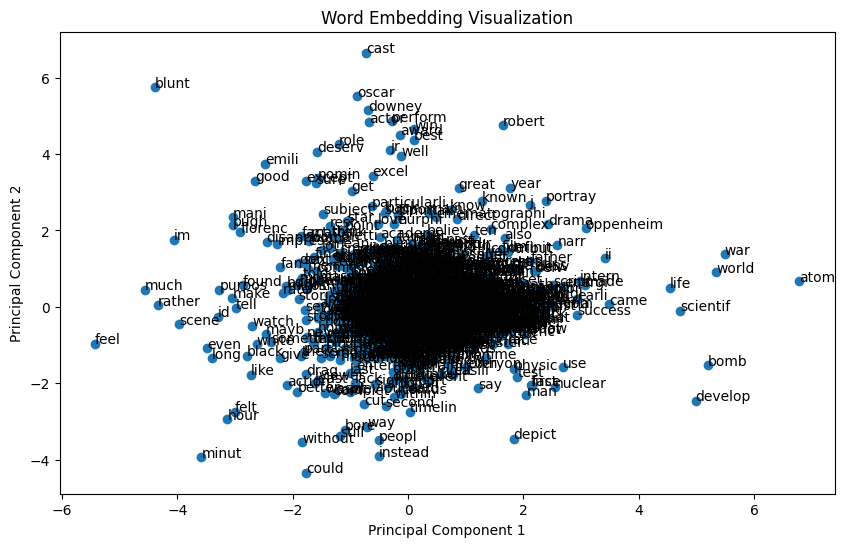

In [ ]:
import csv
import re
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def clean_text(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text.lower())
    return cleaned_text

def load_reviews_from_csv(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)
        reviews = [row[1] for row in csv_reader]
    return reviews

def tokenize(text):
    return text.split()

if __name__ == '__main__':
    filename = 'cleaned_movie_reviews.csv'
    reviews = load_reviews_from_csv(filename)


    cleaned_reviews = [clean_text(review) for review in reviews]
    tokenized_reviews = [tokenize(review) for review in cleaned_reviews]


    model = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=1, workers=4)


    words = list(model.wv.index_to_key)
    X = model.wv[words]


    pca = PCA(n_components=2)
    result = pca.fit_transform(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.title('Word Embedding Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/ShashankAlluri/INFO-5731Computational-Methods/blob/main/sentiment_analyzed_reviews%20(1).csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

# Type your answer
I found it interesting and thought-provoking. The task involved different parts, like getting text data, cleaning it up, and analyzing its structure. One part that was a
bit hard was making sure the code worked well and was efficient, especially with big amounts of data. Understanding and using advanced concepts, like how sentences are
structured, took some time to figure out.

But overall, I enjoyed working on it. It was cool to learn how computers can understand and work with human language. I liked trying out different ways to handle the data
and see how it affected the results.

The time given to finish the assignment was okay. The tasks were laid out in a clear way, which helped with planning.